## Importing Important Libraries

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
import warnings

In [7]:
warnings.filterwarnings('ignore')

## Load data

In [8]:
df = pd.read_csv(r"C:\Users\Pradyumn Sharma\Downloads\kaam\thoda\ml\heat_d_model\heart-disease.csv")

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [14]:
df.duplicated().sum()

1

In [15]:
df.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trestbps -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalach   0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exang    -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slope     0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
ca       -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thal     -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
target    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

              thal    target  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trestbps  0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalach  -0.096439  0.421741  
exang     0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slope    -0.104764  0.345877  
ca        0.151832 -0.391724  
thal      1.000000 -0.344029  
target   -0.344029  1.000000

In [16]:
df.shape

(303, 14)

## Pair plot of all features


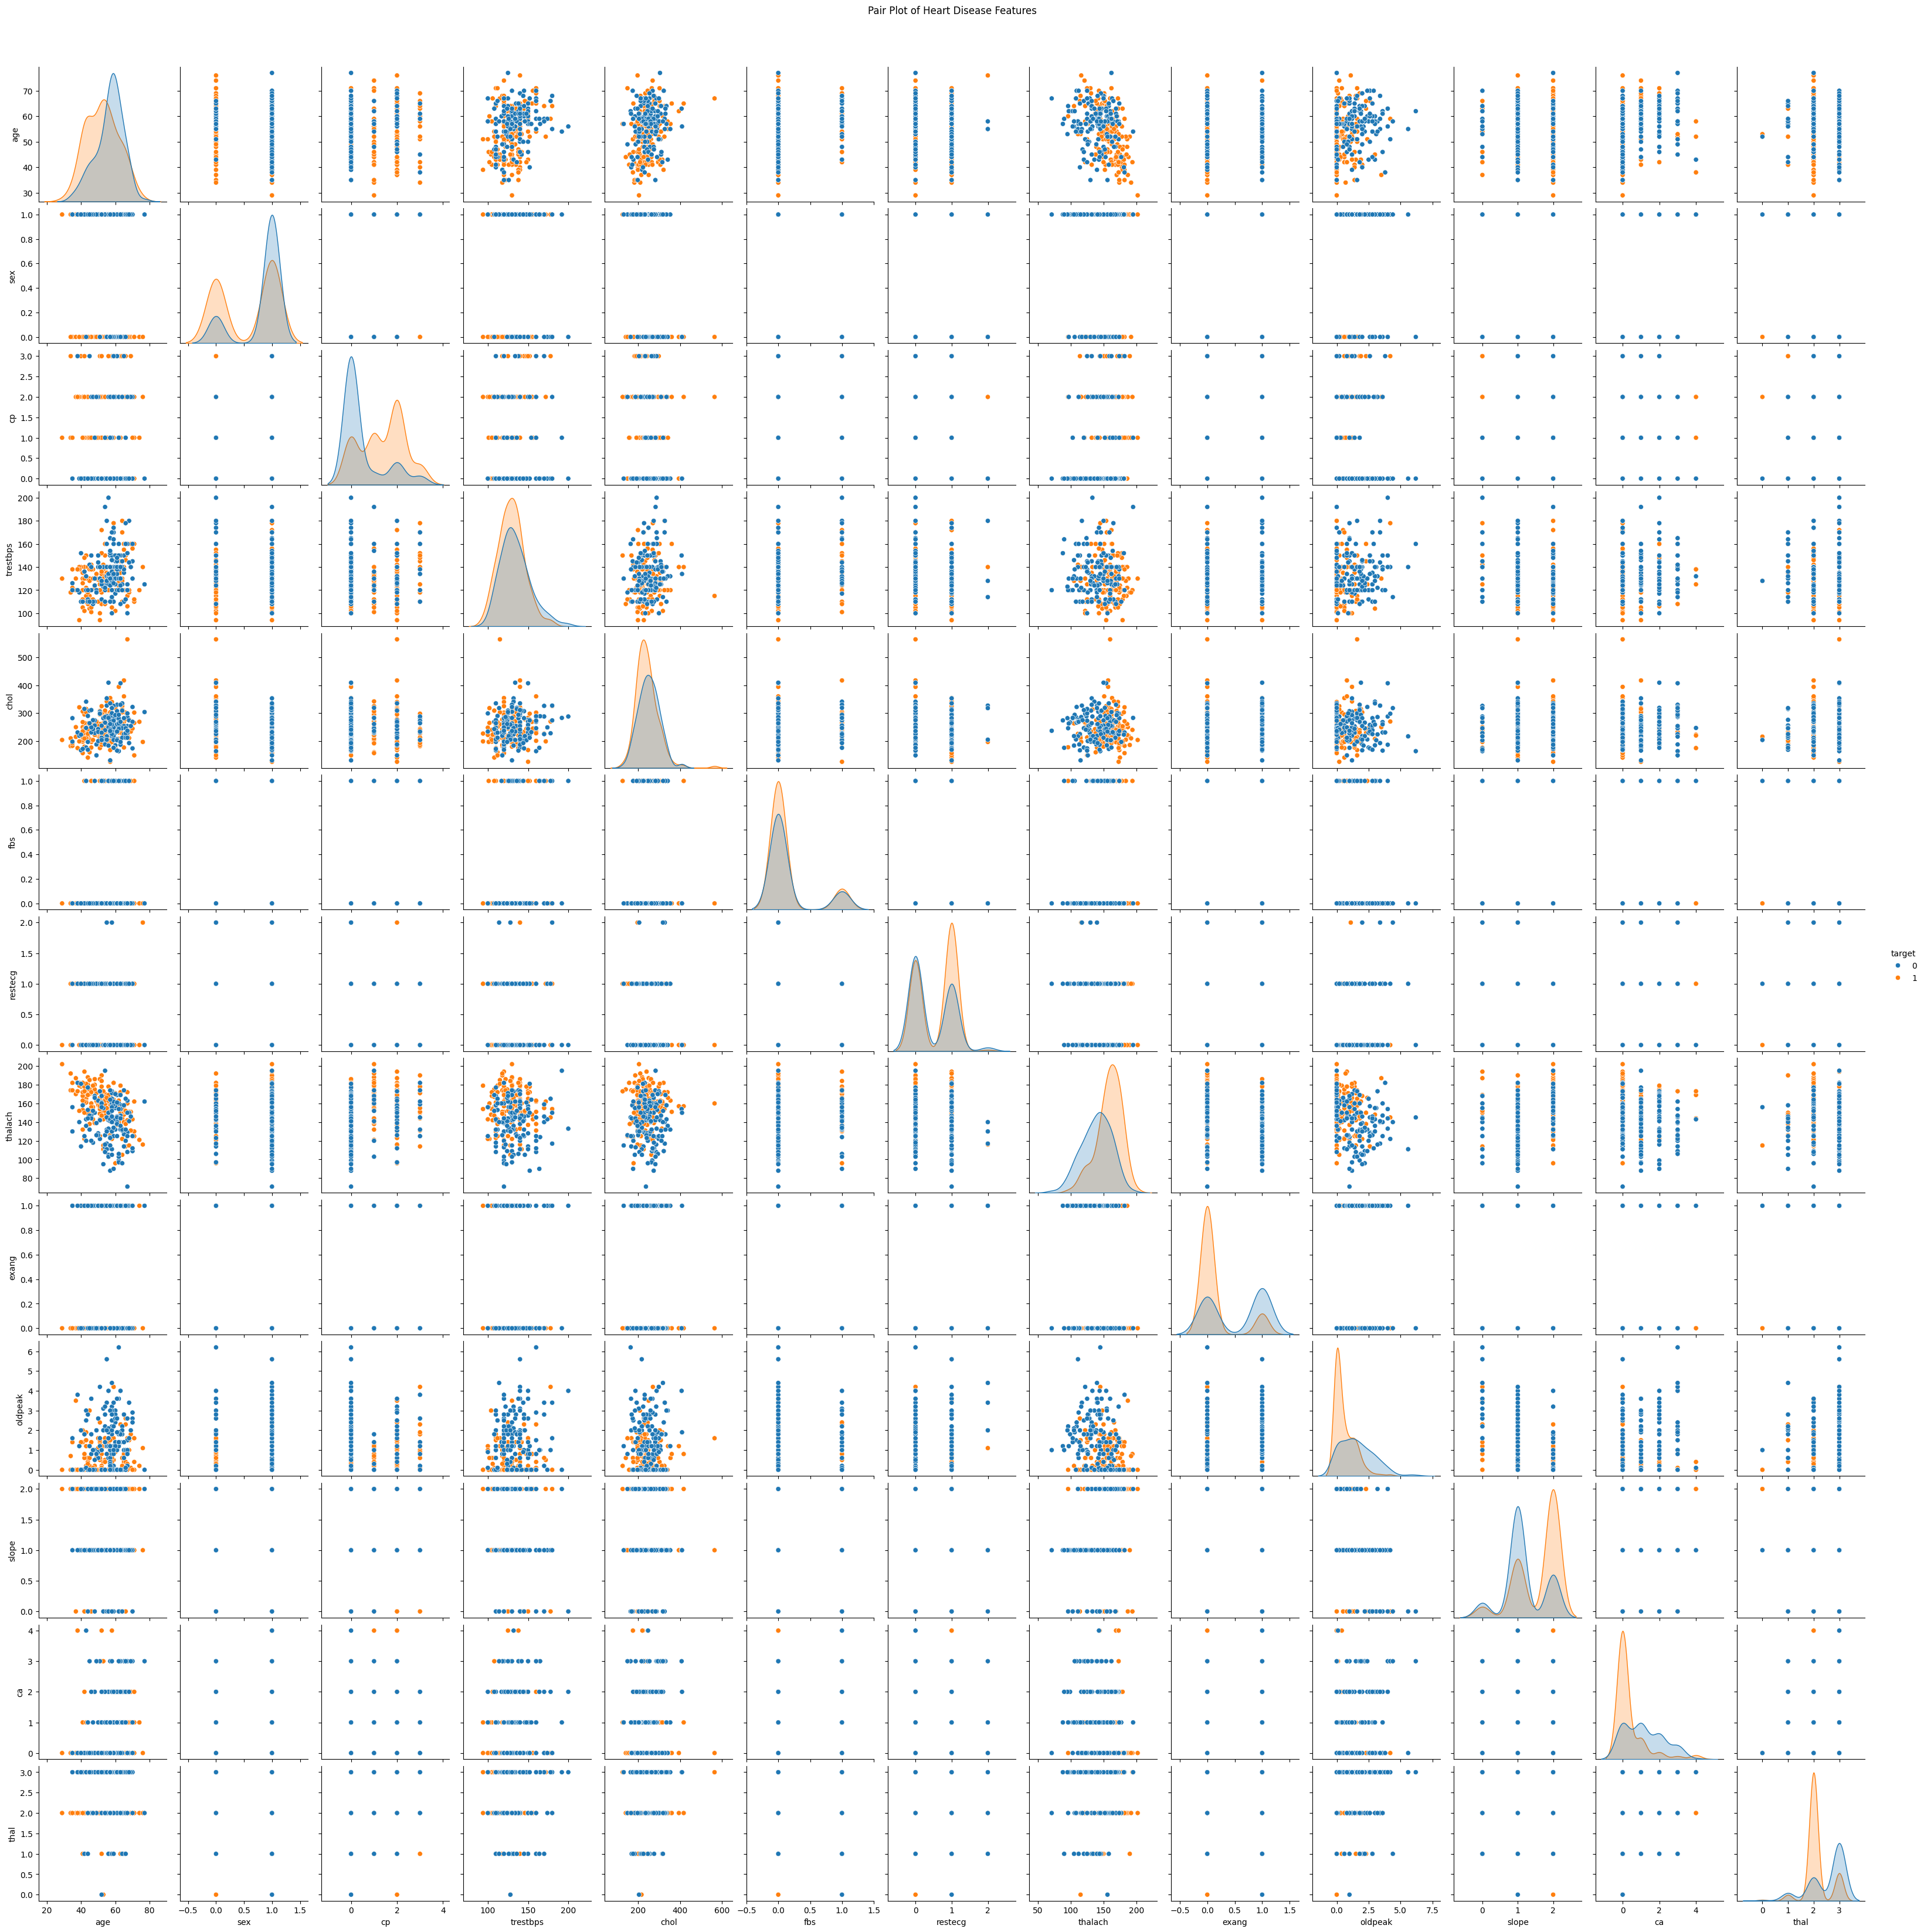

In [17]:
sns.pairplot(df, diag_kind='kde', hue='target')
plt.suptitle('Pair Plot of Heart Disease Features', y=1.02)
plt.show()

In [18]:
correlation_matrix = df.corr()

## Plotting the heatmap of correlations

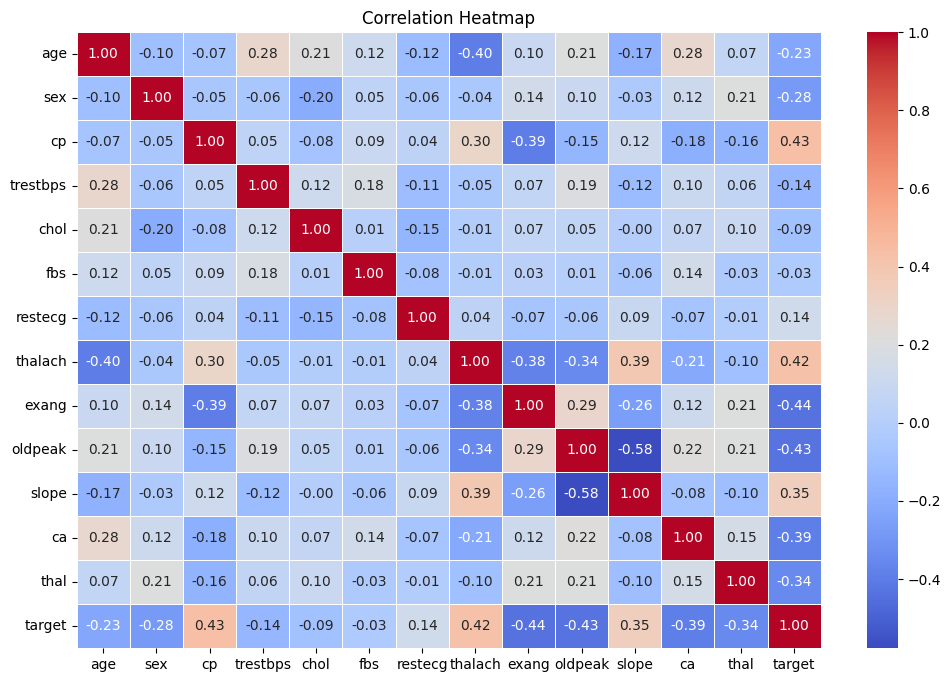

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Feature engineering based on correlation


In [21]:
corr_threshold = 0.3
target_corr = correlation_matrix['target'].abs()
strong_features = target_corr[target_corr > corr_threshold].index.tolist()

df = df[strong_features]

## Check for multicollinearity among the strong features

In [22]:
high_corr_pairs = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            high_corr_pairs.add(correlation_matrix.columns[i])

features_to_drop = list(high_corr_pairs - {'target'})
df = df.drop(columns=features_to_drop)

## Convert categorical variables to dummy/indicator variables

In [23]:
categorical_features = ['cp']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

X = df.drop(columns=['target'])
y = df['target']

## Scale the features

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Split into training and test sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Define the models and their parameter grids


In [26]:
classifiers = {
    'LogisticRegression': (LogisticRegression(), {
        'classifier__penalty': ['l1', 'l2'],
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__solver': ['liblinear', 'saga'],
        'classifier__max_iter': [100, 200, 300]
    }),
    
    'SVM': (SVC(), {
        'classifier__C': [1, 10, 100],
        'classifier__kernel': ['linear', 'rbf'],
        'classifier__gamma': ['scale', 'auto'],
        'classifier__degree': [2, 3, 4]
    }),

    'GradientBoosting': (GradientBoostingClassifier(), {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 4, 5]
    }),

    'NaiveBayes': (GaussianNB(), {
        'classifier__var_smoothing': [1e-9, 1e-8, 1e-7]
    })
}


In [27]:
best_estimators = {}
for clf_name, (clf, params) in classifiers.items():
    print(f"Running Grid Search for {clf_name}...")
    
    # Define pipeline with StandardScaler and the classifier
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', clf)
    ])
    
    # Use GridSearchCV to find the best model
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='accuracy', n_jobs=-1)
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Store the best estimator
    best_estimators[clf_name] = grid_search.best_estimator_
    
    # Print the best parameters and score for each model
    print(f"Best parameters for {clf_name}: {grid_search.best_params_}")
    print(f"Best cross-validated accuracy for {clf_name}: {grid_search.best_score_:.2f}")

Running Grid Search for LogisticRegression...
Best parameters for LogisticRegression: {'classifier__C': 0.01, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best cross-validated accuracy for LogisticRegression: 0.81
Running Grid Search for SVM...
Best parameters for SVM: {'classifier__C': 1, 'classifier__degree': 2, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best cross-validated accuracy for SVM: 0.79
Running Grid Search for GradientBoosting...
Best parameters for GradientBoosting: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
Best cross-validated accuracy for GradientBoosting: 0.81
Running Grid Search for NaiveBayes...
Best parameters for NaiveBayes: {'classifier__var_smoothing': 1e-09}
Best cross-validated accuracy for NaiveBayes: 0.78


## Evaluate all best models on the test set


In [28]:
for clf_name, best_model in best_estimators.items():
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nTest Accuracy for {clf_name}: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))


Test Accuracy for LogisticRegression: 0.85
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


Test Accuracy for SVM: 0.89
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61


Test Accuracy for GradientBoosting: 0.75
              precision    recall  f1-score   support

           0       0.72      0.79      0.75        29
           1       0.79      0.72      0.75        32

    accuracy                           0.75        61
   macro avg 

In [30]:
import plotly.graph_objs as go
import plotly.express as px



In [31]:

# Data for the plot
classifiers = list(test_accuracies.keys())
accuracies = list(test_accuracies.values())

# Creating a bar plot with hover functionality
fig = go.Figure(data=[go.Bar(
    x=classifiers,
    y=accuracies,
    text=[f'{acc:.2f}' for acc in accuracies],  # Display accuracy on hover
    hoverinfo='text',
    marker=dict(color='skyblue')
)])

# Updating layout for better readability
fig.update_layout(
    title='Comparison of Test Accuracies Across Different Models',
    xaxis=dict(title='Classifier'),
    yaxis=dict(title='Test Accuracy', range=[0, 1]),
    template='plotly_white'
)

# Show the plot
fig.show()